<a href="https://colab.research.google.com/github/Hong-Jung1227/Sentimental-Analysis/blob/main/BERT_%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D_News_sentimental_analysis_20221121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><strong>BERT모형 - 커스텀 데이터 적용시켜 감성분석하기</strong></h1>


구글의 BERT모형으로 **뉴스 텍스트 감성분석**을 실습하고자 합니다.
뉴스 데이터를 주택가격 상승에 관한 문장은 1, 주택가격 하락 또는 중립에 관한 문장은 0으로 분류학습시켜 학습데이터를 만들었습니다. 
이 학습데이터와 BERT모형을 활용하여 뉴스 문장이 주택가격 상승을 언급하는지 또는 하락, 중립을 언급하는지 예측하는 인공지능을 생성하였습니다. KERAS를 활용하여 코드를 작성하였으며, 구글 코랩을 기반으로 작성되었습니다.
\
참고 자료:

https://pypi.org/project/keras-bert/,   
https://github.com/CyberZHG/keras-bert/tree/master/keras_bert
<br>https://github.com/kimwoonggon/publicservant_AI 등

<h2><strong> 1. BERT 모형 </strong></h2>
<p> <strong>BERT(Bidirectional Encoder Representations from Transformers)</strong>모형은 2018년 11월 구글이 공개한 인공지능(Artificial Intelligence) 언어 모델로 기존 자연어 모델의 성능을 뛰어넘었으며, 일부 성능 평가에서는 인간보다 더 높은 성능을 기록한 모델입니다.
<br>BERT 모형의 특징은 <strong>사전학습, 문맥학습, 파인튜닝</strong>을 들 수 있습니다. <br>
<br><strong>(사전학습)</strong> 위키피디아 같은 아주 큰 데이터들을 사용하여 '언어 이해' 모델을 사전학습(Pre-training)한다. 광범위한 데이터로 인간이 살아오면서 체득한 지식과 같이 다양한 데이터를 학습하게 됩니다.<br>
<strong>(문맥학습1)</strong> 문장 순서를 학습하여 다음에 나온 문장이 순서에 맞는 문장인지 학습합니다.<br><br>&nbsp;&nbsp;=>  문장1: 저 남자는 회사에 출근했다<br>&nbsp;&nbsp;=>  문장2: 회사에 출근하자마자 저 남자는 커피를 끓여 마셨다.<strong>    (순서가 맞음)</strong><br><br>&nbsp;&nbsp;=> 문장3: 저 여자는 퇴근하려 한다.<br>&nbsp;&nbsp;=> 문장4: 강아지는 예쁘다.<strong>    (순서가 틀린 문장)</strong><br><br><strong>(문맥학습2)</strong> 양방향으로 학습하여 가려진 단어를 맞춘다.<br>&nbsp;&nbsp;&nbsp;&nbsp;문장 : 저 남자는 (①)에 출근했다. 회사에 출근하자마자 저 남자는 (②)를 마셨다.<br>&nbsp;&nbsp;=> ① : 회사 ② : 커피<br><br><strong>(파인튜닝)</strong> 이미 사람처럼 광범위한 글을 학습한 인공지능을 기반으로 하여 새로운 과제를 해결하게 됩니다. 이미 기반 지식이 있기 때문에 새로운 것을 쉽고 빠르게 학습할 수 있습니다.<br>
본 코드에서는 뉴스 데이터를 주택가격 상승관련 기사인지 또는 주택가격 하락 및 중립 관련 기사인지를 예측하는 BERT 모형을 생성하였습니다.</p>

<h2><strong>2. BERT를 활용하여 뉴스데이터 기사의 논조 예측하기</strong></h2>

<p> BERT라는 모형에 뉴스의 논조를 평가하는 데이터를 인풋으로 넣으면 평가가 상승(1)인지 하락 또는 중립(0)인지를 예측하게 됩니다. 상승에 가까우면 1을, 하락 또는 중립에 가까우면 0을 출력합니다.<br>
함수로 표현하면 BERT 모형 함수 <strong>function(뉴스데이터) = 1 or 0</strong>입니다.<br>
<br>
<p> 커스터마이징한 뉴스 데이터 파일을 불러왔습니다. 주택가격 상승 기사는 1, 하락 또는 중립은 0으로 라벨링 되어 있습니다. 이 데이터를 활용하여 뉴스를 인풋으로 넣으면 상승인지 하락(또는 중립)인지 예측하는 값을 예측하는 인공지능 모형을 생성합니다.<br> 본 코드에서는 광범위한 데이터로 사전 훈련된 인공지능 모형을 뉴스 기사 감성 분석 데이터로 파인튜닝(추가학습)하여 아래 그림과 같은 상승(1)/하락(0)을 예측하는 모형을 만들고자 합니다.</p>

<img src = "https://drive.google.com/uc?id=1IuEf3qBUWWVh-RRyJUbIwBCpLVQ8Ny2H" height = 700 width = 600>

<h2><strong>3. BERT 사전학습 모형 가져오기</strong></h2>

https://github.com/google-research/bert 에 접속하여 BERT-Base, Multilingual Cased: 104 languages, 12-layer, 768-hidden, 12-heads, 110M parameters 파일을 다운 받았습니다.

![대체 텍스트](https://i.imgur.com/RlutYyW.png)

<p>사전 학습 모형을 다운 받아 Colab에서 활용하기 위해 구글 GDRIVE에 업로드 하였습니다.</p>



In [ ]:
# wget을 활용해서 bert 모델 다운로드 가능
import os
!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

import zipfile
import shutil
         
bert_zip = zipfile.ZipFile('multi_cased_L-12_H-768_A-12.zip')
bert_zip.extractall('bert')
 
bert_zip.close()

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree("bert/multi_cased_L-12_H-768_A-12", "bert")

--2022-11-17 08:19:06--  https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662903077 (632M) [application/zip]
Saving to: ‘multi_cased_L-12_H-768_A-12.zip’

multi_cased_L-12_H- 100%[===================>] 632.19M  15.9MB/s    in 42s     

2022-11-17 08:19:48 (15.1 MB/s) - ‘multi_cased_L-12_H-768_A-12.zip’ saved [662903077/662903077]



<h2><strong>< Keras와 BERT를 활용한 뉴스 기사 감성 분석 예측 과정 > </strong></h2>


 #### 구글 드라이브와 Colab을 연동합니다



In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


- Colab에서 Bert 모형을 가지고 있는 폴더를 지정해줍니다  

- 파이썬 명령어 os.listdir(path)를 활용하여 폴더가 잘 있는지 확인하면서 진행합니다.

In [ ]:
path = "gdrive/My Drive/Colab Notebooks/"

텐서플로우, 판다스, 넘파이, 케라스 등 필요한 모듈들을 임포트합니다

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import sys
sys.setrecursionlimit(10**7)

import pandas as pd
import numpy as np  
import re
import pickle

import keras as keras
from keras.models import load_model
from keras import backend as K
from keras import Input, Model
from keras import optimizers

import codecs
from tqdm import tqdm
import shutil


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# import warnings
# import tensorflow as tf
# warnings.filterwarnings(action='ignore')
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# tf.logging.set_verbosity(tf.logging.ERROR)

케라스에서 Bert 활용을 쉽게 만들어주는 모듈 keras-bert를 설치합니다<br>그리고 Adam optimizer의 수정판인 keras-radam 모듈을 임포트합니다.

In [ ]:
!pip install keras-bert
!pip install keras-radam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33515 sha256=856fa4068fa73d6a721cb37c4f2de9b1289770c2765387dc192e26bd3b51b0de
  Stored in directory: /root/.cache/pip/wheels/a4/e8/45/842b3a39831261aef9154b907eacbc4ac99499a99ae829b06f
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12305 sha256=43743dfcc110f45ce3270dd97582ebf725e3e9e201fc8c5a425b925db300f235
  Stored in directory: /root/.cache/pip/wheels/46/68/26/692ed21edd832833c3b0a0e21615bcacd99ca458b3f9ed571f
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3959 sha256=479fd57d2176060eca2c23f2299219dab7d1a356d36322754f23005599664a04
  Stored in directory: /root/.cache/pip/wheels/81/67/b5/d847588d075895281e1cf5590f819bd4cf076a554872268bd5
  Created wheel for keras-layer-normalization: filename=keras_layer_normalizatio

keras-bert 라이브러리에서 버트 모형 활용에 필요한 모듈들을 임포트합니다

In [ ]:
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps
from keras_radam import RAdam

In [ ]:
os.listdir("bert")

['bert_model.ckpt.index',
 'vocab.txt',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_config.json',
 'bert_model.ckpt.meta',
 'multi_cased_L-12_H-768_A-12']

버트 모형을 훈련시킬 train 데이터와 test데이터를 pandas 테이블 형식으로 로드합니다

In [ ]:
train = pd.read_csv(path +"ratings_random_train2.csv", encoding = 'cp949')
test = pd.read_csv(path+"ratings_random_test2.csv", encoding = 'cp949')

뉴스 기사 감성분석을 위한 훈련 데이터가 잘 로드되있는지 확인했습니다.  
**document 칼럼에는 문장이, label 칼럼에는 상승(1) 하락(0)이 들어갑니다.**


- bert 훈련을 위한 사전 설정을 합니다. SEQ_LEN은 문장의 최대 길이입니다. SEQ_LEN 보다 문장의 길이가 작다면 남은 부분은 0이 채워지고, 만약에 SEQ_LEN보다 문장 길이가 길다면 SEQ_LEN을 초과하는 부분이 잘리게 됩니다.  
- BATCH_SIZE는 메모리 초과 같은 문제를 방지하기 위해 작은 수인 16으로 정했습니다. 그리고 총 훈련 에포크 수는 2로 정했습니다. 학습율(LR;Learning rate)은 1e-5로 작게 정했습니다.  
- pretrained_path는 bert 사전학습 모형이 있는 폴더를 의미합니다.
- 그리고 우리가 분석할 문장이 들어있는 칼럼의 제목인 document와 긍정인지 부정인지 알려주는 칼럼을 label로 정해줍니다


In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 16
EPOCHS=2
LR=1e-5

pretrained_path ="bert"
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "document"
LABEL_COLUMN = "label"

vocab.txt에 있는 단어에 인덱스를 추가해주는 token_dict라는 딕셔너리를 생성합니다.  
우리가 분석할 문장이 토큰화가 되고, 그 다음에는 인덱스(숫자)로 변경되어서 버트 신경망에 인풋으로 들어게 됩니다.

In [ ]:
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
          token = token.replace("_","")
          token = "##" + token
        token_dict[token] = len(token_dict)

In [ ]:
token_dict

{'[PAD]': 0,
 '[unused1]': 1,
 '[unused2]': 2,
 '[unused3]': 3,
 '[unused4]': 4,
 '[unused5]': 5,
 '[unused6]': 6,
 '[unused7]': 7,
 '[unused8]': 8,
 '[unused9]': 9,
 '[unused10]': 10,
 '[unused11]': 11,
 '[unused12]': 12,
 '[unused13]': 13,
 '[unused14]': 14,
 '[unused15]': 15,
 '[unused16]': 16,
 '[unused17]': 17,
 '[unused18]': 18,
 '[unused19]': 19,
 '[unused20]': 20,
 '[unused21]': 21,
 '[unused22]': 22,
 '[unused23]': 23,
 '[unused24]': 24,
 '[unused25]': 25,
 '[unused26]': 26,
 '[unused27]': 27,
 '[unused28]': 28,
 '[unused29]': 29,
 '[unused30]': 30,
 '[unused31]': 31,
 '[unused32]': 32,
 '[unused33]': 33,
 '[unused34]': 34,
 '[unused35]': 35,
 '[unused36]': 36,
 '[unused37]': 37,
 '[unused38]': 38,
 '[unused39]': 39,
 '[unused40]': 40,
 '[unused41]': 41,
 '[unused42]': 42,
 '[unused43]': 43,
 '[unused44]': 44,
 '[unused45]': 45,
 '[unused46]': 46,
 '[unused47]': 47,
 '[unused48]': 48,
 '[unused49]': 49,
 '[unused50]': 50,
 '[unused51]': 51,
 '[unused52]': 52,
 '[unused53]': 53

- Tokenizer 클래스를 상속받아서 inherit_Tokennizer라는 클래스를 재정의하고 _tokenize 함수를 새로 작성합니다. 왜 상속을 해서 함수를 새로 만들어야 하냐면, 만약 원래 클래스를 그대로 사용하면 입력한 문장이 "완전자모분리"됩니다. 예를 들어서 "인공지능 할 수 있다" 라는 문장이 있다면 원래 "인,##공,##지,##능,할,수,있다"로 분해가 되어야 하는데, ㅇ,##ㅣ,##ㄴ,ㄱ,##ㅗ,##ㅇ,ㅈ,##ㅣ,##ㄴ,##ㅡ,##ㅇ 이런 식으로 토큰화가 됩니다.

- 두칸 아래에서 보시겠지만, inherit_Tokenizer클래스는 문장을 토큰화하는 기능을 합니다. 

- BERT의 토큰화는 단어를 분리하는 토큰화 방식입니다. wordpiece(단어조각?) 방식이라고 하는데, 이는 한국어를 형태소로 꼭 변환해야 할 문제를 해결해주며, 의미가 있는 단어는 밀접하게 연관이 되게 하는 장점까지 갖추고 있습니다.
- 단어의 첫 시작은 ##가 붙지 않지만, 단어에 포함되면서 단어의 시작이 아닌 부분에는 ##가 붙는 것이 특징입니다.

In [ ]:
class inherit_Tokenizer(Tokenizer):
  def _tokenize(self, text):
        if not self._cased:
            text = text
            
            text = text.lower()
        spaced = ''
        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' ' + ch + ' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [ ]:
tokenizer = inherit_Tokenizer(token_dict)

토큰화가 잘 되었는지 확인해 봅니다.
버트 모형은 문장 앞에 꼭 [CLS]라는 문자가 위치하고, [SEP]라는 문자가 끝에 위치합니다.  
[CLS]는 문장의 시작, [SEP]는 문장의 끝을 의미합니다.

In [ ]:
tokenizer.tokenize("케라스로 버트 해보기 정말 재밌음.")

['[CLS]',
 '케',
 '##라',
 '##스로',
 '버',
 '##트',
 '해',
 '##보',
 '##기',
 '정',
 '##말',
 '재',
 '##밌',
 '##음',
 '.',
 '[SEP]']

로드하였던 뉴스 기사 감성분석 데이터를 **버트 모형의 입력에 맞게 변형해주는 함수**를 정의합니다.

함수 내부에 tokenizer.encode 함수가 버트 모형을 토큰화해주고 토큰화 된 단어를 인덱스에 맞게 숫자로 바꿔주게 됩니다.

In [ ]:
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)

def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    
    
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)


    data_x, data_y = convert_data(data_df)

    return data_x, data_y

In [ ]:
train_x, train_y = load_data(train)
test_x, test_y = load_data(test)

100%|██████████| 1425/1425 [00:00<00:00, 5518.59it/s]


- 사전학습된 버트 모델의 인풋은 문장 토큰화가 숫자로 바뀐 것과, 앞문장인지 뒷문장인지 알려주는 문장 순서 벡터가 들어갑니다. 우리는 문장 하나를 가지고만 훈련할 것이므로 순서 벡터는 모두 0으로 통일합니다.

- 그리고 파인튜닝 시에는 문장 안에 일부 단어를 가리는 마스킹은 사용하지 않습니다.

In [ ]:
train_x

[array([[  101,  8996, 10954, ...,     0,     0,     0],
        [  101,  9069, 52363, ...,     0,     0,     0],
        [  101,   112,  9711, ...,     0,     0,     0],
        ...,
        [  101,  8863, 37388, ...,     0,     0,     0],
        [  101, 48253,  9519, ...,     0,     0,     0],
        [  101,  8853, 37004, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

**버트 모형에 들어갈 인풋은 토큰, 세그먼트, 포지션으로 구성됩니다.**  
버트에 인풋으로 들어가는 토큰은 문장을 토크나이징 한 후, 인덱스 번호를 매긴 것입니다.  
세그먼트는 예를 들어 문장이 두 개가 있다면, 앞의 문장과 뒤의 문장을 구분하는 것입니다.  
포지션 임베딩은 단순히 단어의 위치를 말합니다.

토큰, 세그먼트, 포지션을 인풋으로 버트 모형에 넣으면 기하학적인 문장 공간으로 임베딩이 됩니다.

![대체 텍스트](https://i.imgur.com/l9BTao3.png)

#### 인풋은 총 2개가 들어갑니다
- **(토큰)** 첫번째 인풋은 토큰화 된 것이 인덱싱되어 숫자로 변환된 것  

- **(세그멘트)** 두번째 인풋은 앞문장인지 뒷문장인지 알려주는 숫자들입니다. 이번 튜토리얼에서는 파인튜닝 과정이라 앞문장 뒷문장 구분을 안하기 때문에 모두 0으로 하였습니다.  

- **(포지션)** 단어 순서에 따라서 자동으로 부여됩니다.


In [ ]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data))):
        print(tokenizer.tokenize(data[i]))
        ids, segments = tokenizer.encode(data[i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def sentence_load_data(sentences):#sentence는 List로 받는다
           
    data_x = sentence_convert_data(sentences)

    return data_x

In [ ]:
sentence_load_data(["케라스로 버트 시도하기 정말 어렵지만 흥미로워", "케라스 재밌어 즐거워"])

100%|██████████| 2/2 [00:00<00:00, 4412.73it/s]

['[CLS]', '케', '##라', '##스로', '버', '##트', '시', '##도', '##하기', '정', '##말', '어', '##렵', '##지만', '흥', '##미', '##로', '##워', '[SEP]']
['[CLS]', '케', '##라', '##스', '재', '##밌', '##어', '즐', '##거', '##워', '[SEP]']


[array([[   101,   9806,  17342,  94980,   9336,  15184,   9485,  12092,
          22440,   9670,  89523,   9546, 118879,  28578,  10021,  22458,
          11261,  69592,    102,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,      0,      0,      0,
              0,      0,      0,      0,      0,   

구글 깃허브에서 다운받았던 사전학습된 모델을 colab으로 로드합니다.

In [ ]:
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training=True,
    trainable=True,
    seq_len=SEQ_LEN,)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


모델의 구조를 확인합니다.  
총 12층의 트랜스포머 계층이 있음을 확인할 수 있습니다.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 128)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 128, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 128, 768)     1536        ['Input-Segment[0][0]']      

사전학습 파일을 로드하여, 우리가 불러들였던 사전학습 모델을 변형해줍니다.  
  

input으로는 우리가 문장을 토큰화 하여 숫자로 변형시켜주었던 **토큰 벡터와**, 앞문장인지 뒷문장인지 알려주는 **세그멘트** 두 가지가 되겠습니다.  
  
즉 인풋은 inputs = modle.inputs[:2]로 정의하였습니다.  
  
  
그리고 output은 일단 사전학습 모델을 약간 잘라줍니다.(outputs=Dense(1)) 맨 위 3층을 잘라 낸다음에 잘라낸 부분에 긍정인지 부정인지 알려주는 **Dense(1)을 사전학습 모델에 애드온 시켜 줍니다.**  

Dense(1)은 아웃풋이 하나로, **문장이 상승에 가까우면 0에 가까운 값**을, **하락에 가까우면 1에 가까운 값**을 출력해주는 레이어입니다.



그리고 사전 설치하였던 Radam을 활용하여 deep learning의 기울기 강하 훈련을 하도록 정해줍니다. 그 다음에 bert_model을 return해 줍니다.

In [ ]:
def get_bert_finetuning_model(model):
  inputs = model.inputs[:2]
  dense = model.layers[-3].output


  outputs = keras.layers.Dense(1, activation='sigmoid',kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.02),
                              name = 'real_output')(dense)



  bert_model = keras.models.Model(inputs, outputs)
  bert_model.compile(
      optimizer=RAdam(learning_rate=0.00001, weight_decay=0.0025),
      loss='binary_crossentropy',
      metrics=['accuracy'])
  
  return bert_model
  

**모델의 FLOW를 확인해 보도록 하겠습니다.**

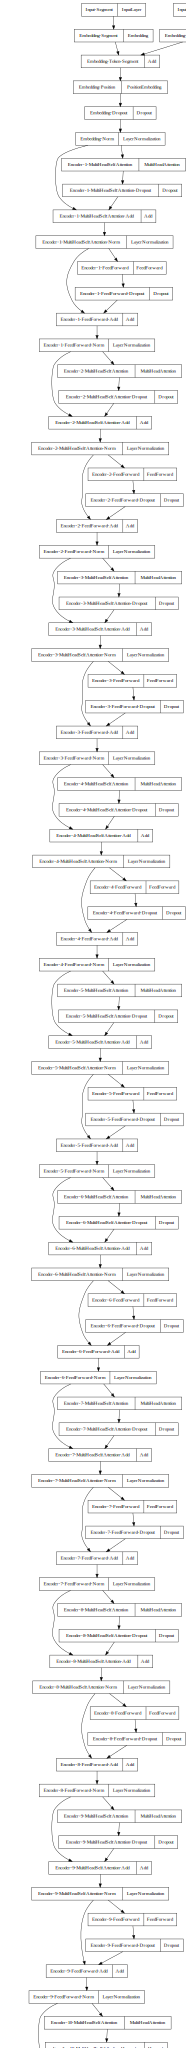

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

bert_model을 get_bert_finetuning_model 함수로 불러들입니다.
이 다음에 bert_model.fit을 활용하여 버트 모형 파인튜닝을 시작하게 됩니다.
실시간으로 테스트 데이터에 대한 정확도를 알기 위해 validation_data = (test_x, test_y)로 정하였습니다.

# 4 에포크 만에 정확도가 88.98%(약 89%)에 도달함을 알 수 있습니다.

In [ ]:
sess = K.get_session()
uninitialized_variables = set([i.decode('ascii') for i in sess.run(tf.report_uninitialized_variables())])
init = tf.variables_initializer([v for v in tf.global_variables() if v.name.split(':')[0] in uninitialized_variables])
sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(train_x, train_y, epochs=4, batch_size=16, verbose = 1, validation_data=(test_x, test_y), shuffle=True)

Train on 5700 samples, validate on 1425 samples
Epoch 1/4
5700/5700 [==============================] - 52s 9ms/sample - loss: 0.6034 - acc: 0.6498 - val_loss: 0.4090 - val_acc: 0.8126
Epoch 2/4
5700/5700 [==============================] - 37s 7ms/sample - loss: 0.3454 - acc: 0.8570 - val_loss: 0.3028 - val_acc: 0.8723
Epoch 3/4
5700/5700 [==============================] - 38s 7ms/sample - loss: 0.2451 - acc: 0.9040 - val_loss: 0.3318 - val_acc: 0.8688
Epoch 4/4
5700/5700 [==============================] - 37s 7ms/sample - loss: 0.1793 - acc: 0.9354 - val_loss: 0.3101 - val_acc: 0.8898


재사용을 위해 bert_model을 지드라이브에 저장해줍니다.

In [ ]:
bert_model.save_weights(path+"/bert_weight.h5")

버트 모형을 로드해줍니다. 이미 로드하였던 모델에 계수들만 얹혀 줍니다.

In [ ]:
bert_model = get_bert_finetuning_model(model)
bert_model.load_weights(path+"/bert_weight.h5")

파인튜닝한 버트 모형에 test 데이터 셋을 넣어 평가해 봅니다.
머신러닝에서는 정확도인 accuracy도 중요하지만, **F1 score**가 매우 중요합니다.
  

긍정문장으로 판별된 문장이 진짜로 **긍정 문장에 속할 확률**  
  

부정문장으로 판별된 문장이 진짜로 **부정 문장에 속할 확률**  
 **이 두가지를 고려한 종합적인 성능이 F1 score입니다.**

한번 F1-score를 확인해 보겠습니다.


먼저 테스트 데이터를 버트 모형에 넣을 수 있도록 predict_convert_data 함수를 정의해줍니다. <br> 위에 정의한 convert_data 함수와 다른 점은, test 데이터이기 때문에 label은 고려하지 않는다는 점입니다

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer.encode(data_df[DATA_COLUMN][i], max_len=SEQ_LEN)
        indices.append(ids)
        
    items = indices
    
    
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

def predict_load_data(x): #Pandas Dataframe을 인풋으로 받는다
    data_df = x
    
    
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)


    data_x = predict_convert_data(data_df)

    return data_x

In [ ]:
test_set = predict_load_data(test)

100%|██████████| 1425/1425 [00:00<00:00, 5491.49it/s]


테스트 셋으로 예측하기

In [ ]:
#예측
preds = bert_model.predict(test_set)

In [ ]:
# 부정이면 0, 긍정이면 1 출력
preds

array([[0.00984022],
       [0.01158936],
       [0.0123943 ],
       ...,
       [0.9884544 ],
       [0.0167326 ],
       [0.01441016]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_true = test['label']
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       739
           1       0.92      0.85      0.88       686

    accuracy                           0.89      1425
   macro avg       0.89      0.89      0.89      1425
weighted avg       0.89      0.89      0.89      1425



F1 스코어와 Accuracy가 거의 비슷함을 알 수 있습니다. 훈련이 치우치지 않고 잘 됐음을 알 수 있습니다.